# Analysis

#### Household sizes generally stay the same regardless of county, thus showing they are not that impacted.

#### Even in areas with a greater population comparatively, the average household size seems to be around 3 people, wether that is a couple and a child is unclear, but makes sense. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
#get csv from project folder
csv_path = "Resources/Average_Household_Size_and_Population_Density_-_County.csv"

#read csv and display all data
household_df = pd.read_csv(csv_path, encoding="utf-8")
household_df.head()

,OBJECTID,COUNTYNS,GEOID,ALAND,AWATER,NAME,State,B25010_001E,B25010_001M,B25010_002E,...,B01001_001E,B01001_001M,B01001_calc_PopDensity,created_user,created_date,last_edited_user,last_edited_date,B01001_calc_PopDensityM,SHAPE_Length,SHAPE_Area
0,1,161526,1001,1539602123,25706961,Autauga County,Alabama,2.59,0.05,2.59,...,55200,NaN,35.853419,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,2.066037,0.150256
1,2,161527,1003,4117546676,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,...,208107,NaN,50.541504,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,4.483746,0.409904
2,3,161528,1005,2292144655,50538698,Barbour County,Alabama,2.49,0.07,2.44,...,25782,NaN,11.247981,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,2.695262,0.223270
3,4,161529,1007,1612167481,9602089,Bibb County,Alabama,2.99,0.14,3.05,...,22527,NaN,13.973114,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,1.887514,0.156473
4,5,161530,1009,1670103911,15015423,Blount County,Alabama,2.77,0.05,2.85,...,57645,NaN,34.515816,esri_demographics,2020/04/01 20:53:36+00,esri_demographics,2020/04/01 20:53:36+00,0.0,2.423552,0.164405


In [3]:
# remove unneeded columns
# we'll be keeping the name of the county, state, average household size, and total population
cleaned_df = household_df[["NAME", "State", "B25010_001E","B01001_001E"]]

cleaned_df

,NAME,State,B25010_001E,B01001_001E
0,Autauga County,Alabama,2.59,55200
1,Baldwin County,Alabama,2.61,208107
2,Barbour County,Alabama,2.49,25782
3,Bibb County,Alabama,2.99,22527
4,Blount County,Alabama,2.77,57645
...,...,...,...,...
3215,Vega Baja Municipio,Puerto Rico,2.93,53371
3216,Vieques Municipio,Puerto Rico,3.55,8771
3217,Villalba Municipio,Puerto Rico,2.96,22993
3218,Yabucoa Municipio,Puerto Rico,2.91,34149


In [4]:
# clean up and rename the DF
renamed_df = cleaned_df.rename(columns={ 
    "NAME" : "County", 
    "State":"State", 
    "B25010_001E":"Avg Household Size",
    "B01001_001E":"Total Population"
})

renamed_df

,County,State,Avg Household Size,Total Population
0,Autauga County,Alabama,2.59,55200
1,Baldwin County,Alabama,2.61,208107
2,Barbour County,Alabama,2.49,25782
3,Bibb County,Alabama,2.99,22527
4,Blount County,Alabama,2.77,57645
...,...,...,...,...
3215,Vega Baja Municipio,Puerto Rico,2.93,53371
3216,Vieques Municipio,Puerto Rico,3.55,8771
3217,Villalba Municipio,Puerto Rico,2.96,22993
3218,Yabucoa Municipio,Puerto Rico,2.91,34149


In [5]:
#renamed_df = renamed_df.set_index("County")
#renamed_df

In [14]:
#look for the counties needed in the csv and make a new dataframe with only those counties
counties = ['Mecklenburg County' , 'Travis County', 'San Francisco County', 'Denver County']

cleaned_counties_df = renamed_df[renamed_df['County'].isin(counties)==True]
cleaned_counties_df

,County,State,Avg Household Size,Total Population
223,San Francisco County,California,2.36,870044
260,Denver County,Colorado,2.31,693417
1949,Mecklenburg County,North Carolina,2.57,1054314
2749,Travis County,Texas,2.57,1203166
2877,Mecklenburg County,Virginia,2.53,30847


In [16]:
#there is a Mecklenburg county in Virginia, so we need to drop that one. 
dropped_df = cleaned_counties_df.drop(cleaned_counties_df[cleaned_counties_df['State'] == 'Virginia'].index)
dropped_df

,County,State,Avg Household Size,Total Population
223,San Francisco County,California,2.36,870044
260,Denver County,Colorado,2.31,693417
1949,Mecklenburg County,North Carolina,2.57,1054314
2749,Travis County,Texas,2.57,1203166


Text(0.5, 1.0, 'Population by County')

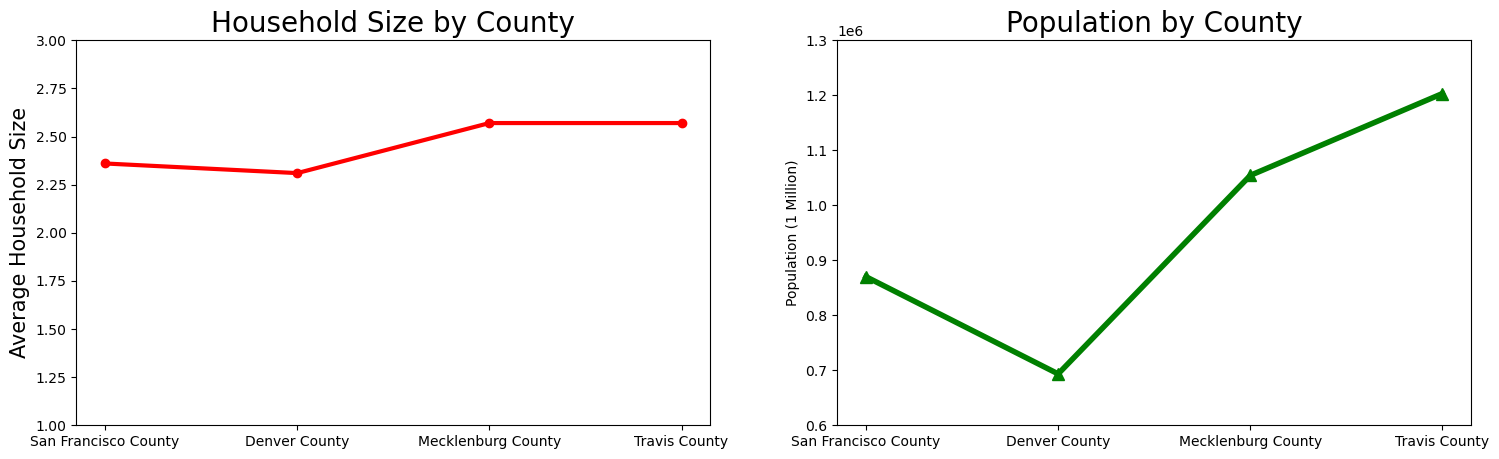

In [94]:
"""plt.title("Average and Median Income per County")
plt.ylabel('Income')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.show()
"""


#create the variable the counties, household size, and population will pull from in the graphs
county = dropped_df["County"]
size = dropped_df["Avg Household Size"]
population = dropped_df["Total Population"]

#plot the graphs declarign there will be 2 and what size they will be.
#include what the graphs will display and formatting
fig,axes = plt.subplots(1,2, figsize= (18,5))
axes[0].plot(county, size, color="red", marker="o", markersize = 6 ,linewidth =3)
axes[1].plot(county, population, color="green", marker="^",markersize = 8 ,linewidth =4)

#set boundaries for the graphs because they were not sized properly
axes[0].set_ylim(1,3)
axes[1].set_ylim(600000,1300000)

#formatting for the labels of the graphs
axes[0].set_ylabel("Average Household Size",fontsize=15)
axes[1].set_ylabel("Population (1 Million)",fontsize=10)

axes[0].set_title("Household Size by County", fontsize=20)
axes[1].set_title("Population by County", fontsize=20)


In [96]:
#save our figure as a PNG
fig.savefig('Images/Household_Sizes.png')